___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [160]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.options.display.max_columns = 25

In [104]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [105]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [106]:
from skimpy import clean_columns
df = clean_columns(df)

19 column names have been cleaned

In [107]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [108]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   gender             7032 non-null   object 
 2   senior_citizen     7032 non-null   int64  
 3   partner            7032 non-null   object 
 4   dependents         7032 non-null   object 
 5   tenure             7032 non-null   int64  
 6   phone_service      7032 non-null   object 
 7   multiple_lines     7032 non-null   object 
 8   internet_service   7032 non-null   object 
 9   online_security    7032 non-null   object 
 10  online_backup      7032 non-null   object 
 11  device_protection  7032 non-null   object 
 12  tech_support       7032 non-null   object 
 13  streaming_tv       7032 non-null   object 
 14  streaming_movies   7032 non-null   object 
 15  contract           7032 non-null   object 
 16  paperless_billing  7032 

In [109]:
def check_df(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Per_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0], 2))
    print('Num_of_Nulls   : ', df[col].isnull().sum())
    print(df[col].value_counts(dropna = False))
    print(""*30)
    print("\n\n")
    ## we can add nunique values


for col in df.columns :
    check_df(col)

column name :  customer_id
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customer_id, Length: 7032, dtype: int64




column name :  gender
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Male      3549
Female    3483
Name: gender, dtype: int64




column name :  senior_citizen
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
0    5890
1    1142
Name: senior_citizen, dtype: int64




column name :  partner
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
No     3639
Yes    3393
Name: partner, dtype: int64




column name :  dependents
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
No     4933
Yes    2099
Name: dependents, dtype: int64




column name :  tenure
----

**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [110]:
# CODE HERE
df.describe(exclude="O")

senior_citizen       tenure  monthly_charges  total_charges
count     7032.000000  7032.000000      7032.000000    7032.000000
mean         0.162400    32.421786        64.798208    2283.300441
std          0.368844    24.545260        30.085974    2266.771362
min          0.000000     1.000000        18.250000      18.800000
25%          0.000000     9.000000        35.587500     401.450000
50%          0.000000    29.000000        70.350000    1397.475000
75%          0.000000    55.000000        89.862500    3794.737500
max          1.000000    72.000000       118.750000    8684.800000

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [111]:
# CODE HERE
df.isnull().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

In [112]:
print(df.churn.value_counts())
print()
print(df.churn.value_counts(normalize=True))

No     5163
Yes    1869
Name: churn, dtype: int64

No     0.734215
Yes    0.265785
Name: churn, dtype: float64


''

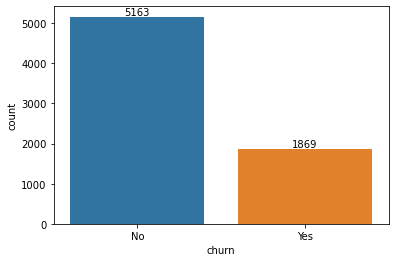

In [113]:
# CODE HERE
ax = sns.countplot(x = "churn", data=df)
for i in ax.containers:
    ax.bar_label(i)
;

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

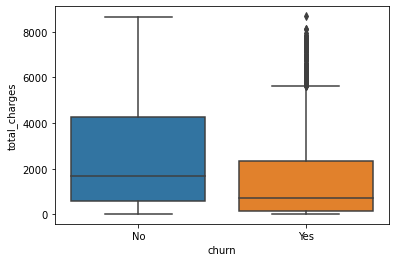

In [114]:
# CODE HERE
sns.boxplot(x=df.churn, y=df.total_charges);

<AxesSubplot:xlabel='churn', ylabel='total_charges'>

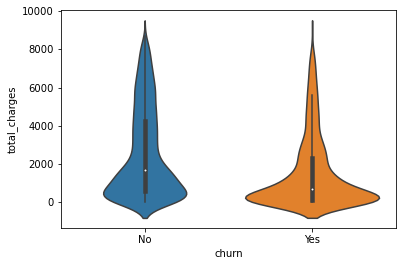

In [115]:
sns.violinplot(x=df.churn, y=df.total_charges)

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

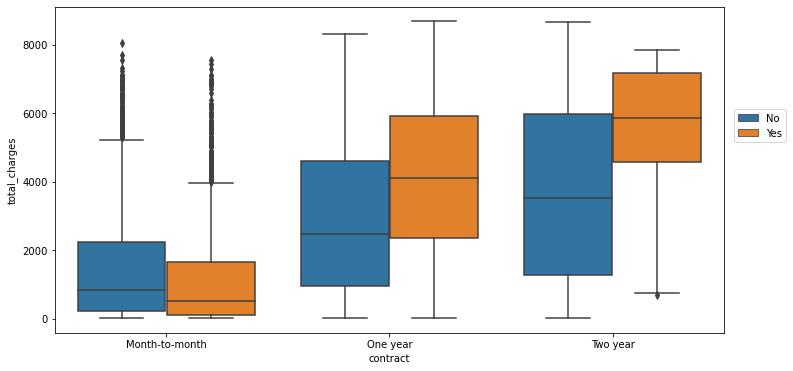

In [116]:
#CODE HERE
plt.figure(figsize=(12,6))
sns.boxplot(x=df.contract, y=df.total_charges, hue=df.churn)
plt.legend(bbox_to_anchor=(1.1, 0.7));

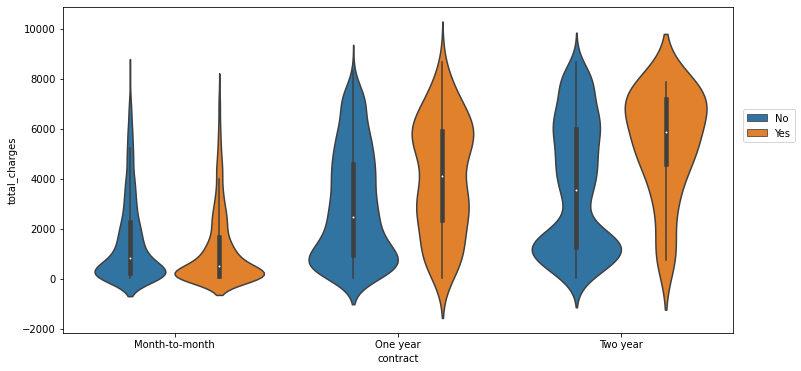

In [117]:
#CODE HERE
plt.figure(figsize=(12,6))
sns.violinplot(x=df.contract, y=df.total_charges, hue=df.churn)
plt.legend(bbox_to_anchor=(1.1, 0.7));

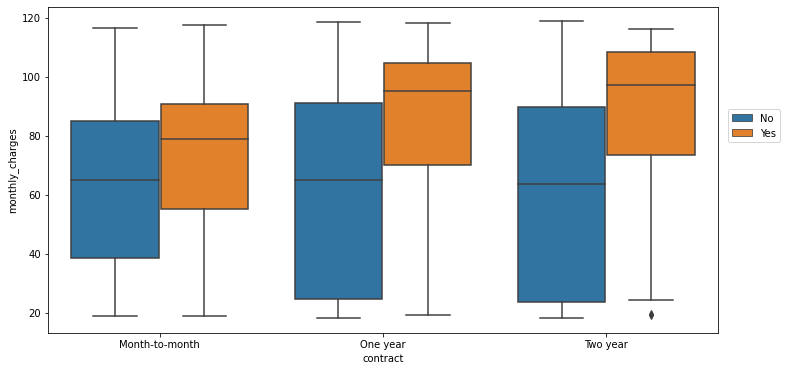

In [118]:
#CODE HERE
plt.figure(figsize=(12,6))
sns.boxplot(x=df.contract, y=df.monthly_charges, hue=df.churn)
plt.legend(bbox_to_anchor=(1.1, 0.7));

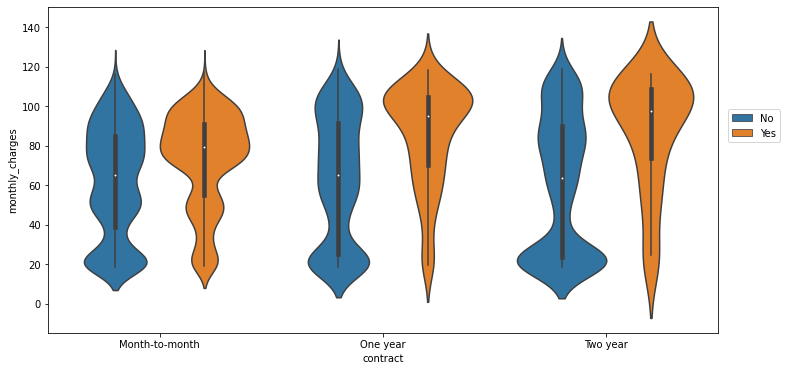

In [119]:
#CODE HERE
plt.figure(figsize=(12,6))
sns.violinplot(x=df.contract, y=df.monthly_charges, hue=df.churn)
plt.legend(bbox_to_anchor=(1.1, 0.7));

In [120]:
df.contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: contract, dtype: int64

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [121]:
#CODE HERE
df_dummy = pd.get_dummies(df.drop(columns="customer_id"))

In [122]:
df_dummy

senior_citizen  tenure  monthly_charges  total_charges  gender_Female  \
0                  0       1            29.85          29.85              1   
1                  0      34            56.95        1889.50              0   
2                  0       2            53.85         108.15              0   
3                  0      45            42.30        1840.75              0   
4                  0       2            70.70         151.65              1   
...              ...     ...              ...            ...            ...   
7027               0      24            84.80        1990.50              0   
7028               0      72           103.20        7362.90              1   
7029               0      11            29.60         346.45              1   
7030               1       4            74.40         306.60              0   
7031               0      66           105.65        6844.50              0   

      gender_Male  partner_No  partner_Yes  dependents_No  dependents_Yes  \
0               0           0            1              1               0   
1               1           1            0              1               0   
2               1           1            0              1               0   
3               1           1            0              1               0   
4               0           1            0              1               0   
...           ...         ...          ...            ...             ...   
7027            1           0            1              0               1   
7028            0           0            1              0               1   
7029            0           0            1              0               1   
7030            1           0            1              1               0   
7031            1           1            0              1               0   

      phone_service_No  phone_service_Yes  ...  streaming_movies_Yes  \
0                    1                  0  ...                     0   
1                    0                  1  ...                     0   
2                    0                  1  ...                     0   
3                    1                  0  ...                     0   
4                    0                  1  ...                     0   
...                ...                ...  ...                   ...   
7027                 0                  1  ...                     1   
7028                 0                  1  ...                     1   
7029                 1                  0  ...                     0   
7030                 0                  1  ...                     0   
7031                 0                  1  ...                     1   

      contract_Month-to-month  contract_One year  contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7027                        0                  1                  0   
7028                        0                  1                  0   
7029                        1                  0                  0   
7030                        1                  0                  0   
7031                        0                  0                  1   

      paperless_billing_No  paperless_billing_Yes  \
0                        0                      1   
1                        1                      0   
2                        0                      1   
3                        1                      0   
4                        0                      1   
...                    ...                    ...   
7027                     0                 

In [123]:
corr = df_dummy.corr()["churn_Yes"][:-2]

<AxesSubplot:>

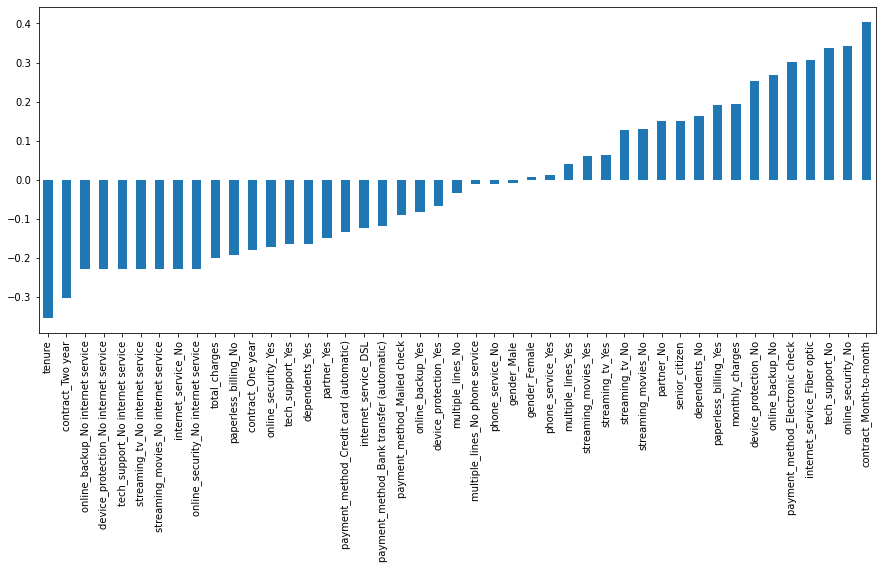

In [124]:
plt.figure(figsize=(15,6))
corr.sort_values().plot(kind="bar")

## Feature Engineering

In [125]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [126]:
df["tenure_cohort"] = df.tenure.apply(cohort)

In [127]:
df.drop(columns=["customer_id", "paperless_billing", "tenure"], inplace=True)

In [128]:
df.shape

(7032, 19)

In [129]:
df.head()

gender  senior_citizen partner dependents phone_service    multiple_lines  \
0  Female               0     Yes         No            No  No phone service   
1    Male               0      No         No           Yes                No   
2    Male               0      No         No           Yes                No   
3    Male               0      No         No            No  No phone service   
4  Female               0      No         No           Yes                No   

  internet_service online_security online_backup device_protection  \
0              DSL              No           Yes                No   
1              DSL             Yes            No               Yes   
2              DSL             Yes           Yes                No   
3              DSL             Yes            No               Yes   
4      Fiber optic              No            No                No   

  tech_support streaming_tv streaming_movies        contract  \
0           No           No               No  Month-to-month   
1           No           No               No        One year   
2           No           No               No  Month-to-month   
3          Yes           No               No        One year   
4           No           No               No  Month-to-month   

              payment_method  monthly_charges  total_charges churn  \
0           Electronic check            29.85          29.85    No   
1               Mailed check            56.95        1889.50    No   
2               Mailed check            53.85         108.15   Yes   
3  Bank transfer (automatic)            42.30        1840.75    No   
4           Electronic check            70.70         151.65   Yes   

  tenure_cohort  
0   0-12 Months  
1  24-48 Months  
2   0-12 Months  
3  24-48 Months  
4   0-12 Months

In [130]:
df["multiple_lines"].replace("No phone service", "No", inplace=True)

In [131]:
converter_list = ["online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies"]

for i in converter_list:
    df[i].replace("No internet service", "No", inplace=True)


In [132]:
for i in converter_list:
    print(df[i].value_counts())
    print()

No     5017
Yes    2015
Name: online_security, dtype: int64

No     4607
Yes    2425
Name: online_backup, dtype: int64

No     4614
Yes    2418
Name: device_protection, dtype: int64

No     4992
Yes    2040
Name: tech_support, dtype: int64

No     4329
Yes    2703
Name: streaming_tv, dtype: int64

No     4301
Yes    2731
Name: streaming_movies, dtype: int64



In [133]:
df.multiple_lines.value_counts()

No     4065
Yes    2967
Name: multiple_lines, dtype: int64

In [134]:
df.head()

gender  senior_citizen partner dependents phone_service multiple_lines  \
0  Female               0     Yes         No            No             No   
1    Male               0      No         No           Yes             No   
2    Male               0      No         No           Yes             No   
3    Male               0      No         No            No             No   
4  Female               0      No         No           Yes             No   

  internet_service online_security online_backup device_protection  \
0              DSL              No           Yes                No   
1              DSL             Yes            No               Yes   
2              DSL             Yes           Yes                No   
3              DSL             Yes            No               Yes   
4      Fiber optic              No            No                No   

  tech_support streaming_tv streaming_movies        contract  \
0           No           No               No  Month-to-month   
1           No           No               No        One year   
2           No           No               No  Month-to-month   
3          Yes           No               No        One year   
4           No           No               No  Month-to-month   

              payment_method  monthly_charges  total_charges churn  \
0           Electronic check            29.85          29.85    No   
1               Mailed check            56.95        1889.50    No   
2               Mailed check            53.85         108.15   Yes   
3  Bank transfer (automatic)            42.30        1840.75    No   
4           Electronic check            70.70         151.65   Yes   

  tenure_cohort  
0   0-12 Months  
1  24-48 Months  
2   0-12 Months  
3  24-48 Months  
4   0-12 Months

In [135]:
df.churn = df.churn.map({"Yes": 1, "No":0})

In [136]:
df.churn.value_counts()

0    5163
1    1869
Name: churn, dtype: int64

## Data Preprocesssing

In [137]:
X = df.drop(columns="churn")
y= df["churn"]

In [138]:
cat = X.select_dtypes(include="O").columns
cat

Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'payment_method', 'tenure_cohort'],
      dtype='object')

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [140]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (5625, 18)
Train target shape   :  (5625,)
Test features shape  :  (1407, 18)
Test target shape    :  (1407,)


In [141]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer

encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

column_trans = make_column_transformer((encoder, cat), remainder=StandardScaler())

In [142]:
column_trans

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'payment_method', 'tenure_cohort'],
      dtype='object'))])

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**




## Logistic Model

### Vanilla Logistic Model

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=42))]

pipe_log_model = Pipeline(steps=operations)


In [144]:
pipe_log_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'payment_method', 'tenure_cohort'],
      dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [145]:
y_pred = pipe_log_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score

In [147]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [148]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[732 301]
 [ 80 294]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407


Train_Set
[[3052 1078]
 [ 296 1199]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      4130
           1       0.53      0.80      0.64      1495

    accuracy                           0.76      5625
   macro avg       0.72      0.77      0.73      5625
weighted avg       0.81      0.76      0.77      5625



### Cross Validation

In [149]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, cv=10, scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"])


In [150]:
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.iloc[:, 2:].mean()

test_accuracy              0.754667
test_precision_weighted    0.808250
test_recall_weighted       0.754667
test_f1_weighted           0.767220
dtype: float64

### GridSearchCV

In [182]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=42))]
model = Pipeline(steps=operations)

In [183]:
model.get_params()

{'memory': None,
 'steps': [('OneHotEncoder',
   ColumnTransformer(remainder=StandardScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
          'internet_service', 'online_security', 'online_backup',
          'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
          'contract', 'payment_method', 'tenure_cohort'],
         dtype='object'))])),
  ('log',
   LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42))],
 'verbose': False,
 'OneHotEncoder': ColumnTransformer(remainder=StandardScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),

In [184]:
param_grid = {'log__C' : [0.1, 1, 2],
              'log__penalty':['l1', 'l2'],
              'log__solver' : ["lbfgs", "liblinear"]}

In [187]:
log_model_grid = GridSearchCV(model, param_grid=param_grid, scoring="f1_weighted", cv=5, n_jobs=-1)

In [188]:
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'payment_method', 'tenure_cohort'],
      dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 1, 2], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['lbfgs', 'liblinear']},
             scoring='f1_weighted')

In [189]:
log_model_grid.best_score_

0.7660603032489695

In [190]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [191]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[732 301]
 [ 80 294]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407


Train_Set
[[3052 1078]
 [ 296 1199]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      4130
           1       0.53      0.80      0.64      1495

    accuracy                           0.76      5625
   macro avg       0.72      0.77      0.73      5625
weighted avg       0.81      0.76      0.77      5625



## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [178]:
#CODE HERE

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [183]:
#CODE HERE

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



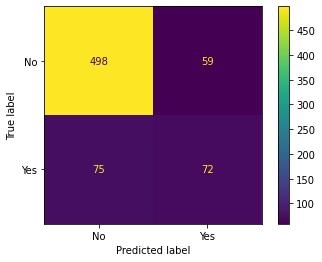

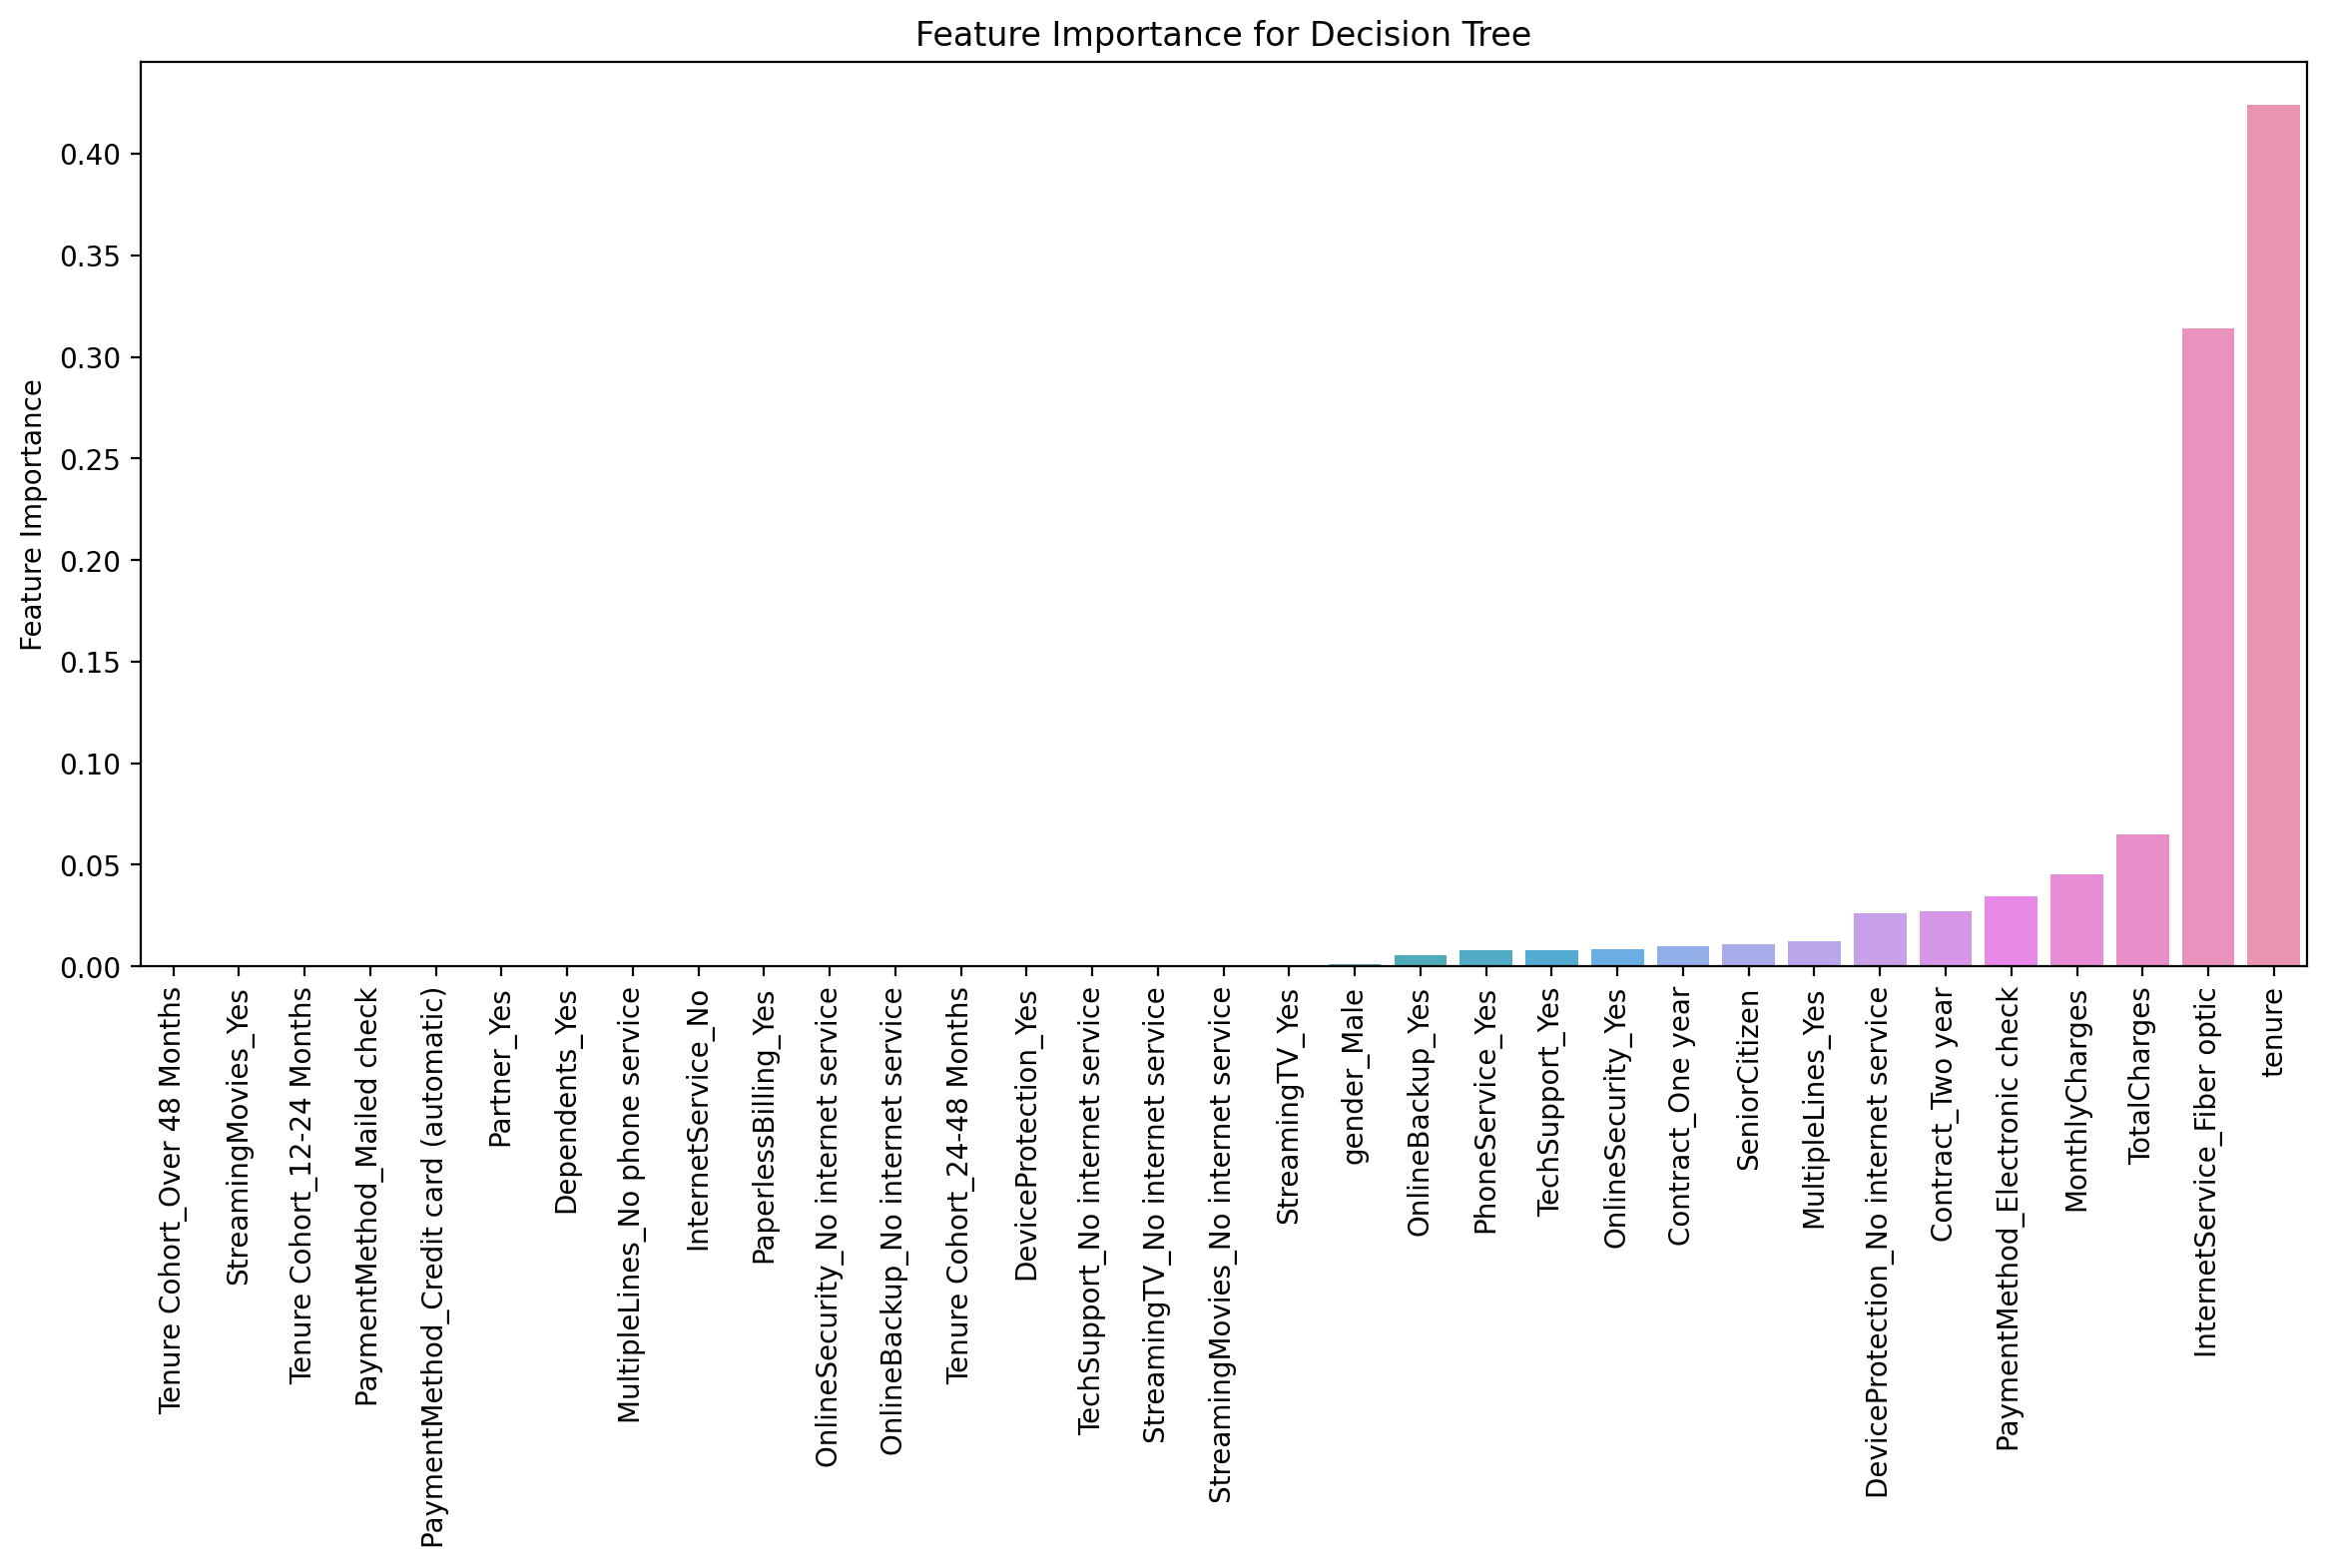

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [259]:
#CODE HERE

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.44      0.48       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



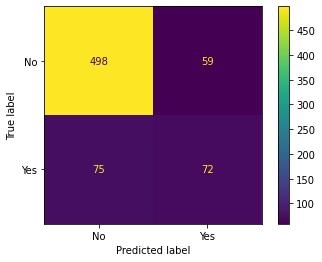

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [ ]:
#CODE HERE

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



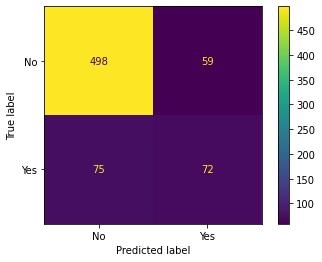

**TASK: Analyze your results, which model performed best for you?**

In [294]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [152]:
# CODE HERE

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

In [154]:
#CODE HERE

<img src="fig5.png">

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

In [156]:
#CODE HERE

<img src="fig6.png">

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

In [158]:
#CODE HERE

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [161]:
#CODE HERE

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

In [165]:
#CODE HERE

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [167]:
# CODE HERE

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

In [171]:
#CODE HERE

<img src='fig10.png'>

**TASK: Create a count plot showing the churn count per cohort.**

In [1]:
# CODE HERE

<img src='cplot.png'>

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

In [174]:
#CODE HERE

<img src='fig11.png'>

### Great job!